<a href="https://colab.research.google.com/github/sean-neary/Project-submission/blob/main/Poster_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
%matplotlib inline
import csv
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas.testing as tm
from sklearn import datasets
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
import statsmodels.api as sm
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from numpy import arange
import itertools
import time
import statsmodels.api as sm
from sklearn.preprocessing import scale 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


In [38]:
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
df.head()
print("Number of games: ", len(df))
df = df.dropna()
df.head()


Number of games:  16719


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [39]:
df1 = df.drop(columns=['Name', 'Genre', 'Critic_Count','User_Count','Developer', 'Rating','Publisher','NA_Sales','JP_Sales','Other_Sales'])
df1.head()



,Platform,Year_of_Release,EU_Sales,Global_Sales,Critic_Score,User_Score
0,Wii,2006.0,28.96,82.53,76.0,8
2,Wii,2008.0,12.76,35.52,82.0,8.3
3,Wii,2009.0,10.93,32.77,80.0,8
6,DS,2006.0,9.14,29.80,89.0,8.5
7,Wii,2006.0,9.18,28.92,58.0,6.6


In [40]:

df = pd.get_dummies(df1)
df.head()

,Year_of_Release,EU_Sales,Global_Sales,Critic_Score,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,User_Score_0.5,User_Score_0.6,User_Score_0.7,User_Score_0.9,User_Score_1,User_Score_1.2,User_Score_1.3,User_Score_1.4,User_Score_1.5,User_Score_1.7,User_Score_1.8,User_Score_1.9,User_Score_2,User_Score_2.1,User_Score_2.2,User_Score_2.3,User_Score_2.4,User_Score_2.5,User_Score_2.6,...,User_Score_5.7,User_Score_5.8,User_Score_5.9,User_Score_6,User_Score_6.1,User_Score_6.2,User_Score_6.3,User_Score_6.4,User_Score_6.5,User_Score_6.6,User_Score_6.7,User_Score_6.8,User_Score_6.9,User_Score_7,User_Score_7.1,User_Score_7.2,User_Score_7.3,User_Score_7.4,User_Score_7.5,User_Score_7.6,User_Score_7.7,User_Score_7.8,User_Score_7.9,User_Score_8,User_Score_8.1,User_Score_8.2,User_Score_8.3,User_Score_8.4,User_Score_8.5,User_Score_8.6,User_Score_8.7,User_Score_8.8,User_Score_8.9,User_Score_9,User_Score_9.1,User_Score_9.2,User_Score_9.3,User_Score_9.4,User_Score_9.5,User_Score_9.6
0,2006.0,28.96,82.53,76.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2008.0,12.76,35.52,82.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2009.0,10.93,32.77,80.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2006.0,9.14,29.80,89.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,2006.0,9.18,28.92,58.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
y = df.Global_Sales

X = df.drop(['Global_Sales'], axis=1).astype('float64')

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [43]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

(5460, 109) (1365, 109) (5460,) (1365,)


LinearRegression()

In [44]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


In [45]:
print(predictions[0:5])
print(y_test[0:5])

[ 2.98159409  0.03063774 -0.3003521   0.10619164  0.63598251]
272      4.21
11819    0.07
15723    0.02
5040     0.38
3591     0.56
Name: Global_Sales, dtype: float64


Text(0, 0.5, 'Predictions')

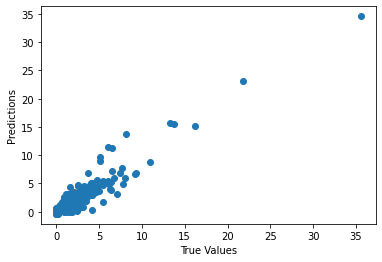

In [46]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [60]:
print ("Test Score:", model.score(X_test, y_test))
print ("Training Score:", model.score(X_train, y_train))

Test Score: 0.8628868336881247
Training Score: 0.9723178139770222


In [65]:
#decision tree regression
DTree_regressor = DecisionTreeRegressor()
model = DTree_regressor.fit(X_train, y_train)




print("Training set score: ", model.score(X_train, y_train))
print("Test set score: ", model.score(X_test, y_test))

Training set score:  0.9999518854301354
Test set score:  0.7689754943117731


In [67]:
#random forest regression

RF = RandomForestRegressor(n_estimators=300, random_state=5)
model = RF.fit(X_train, y_train)





print("Training set score: ", model.score(X_train, y_train))
print("Test set score: ", model.score(X_test, y_test))

Training set score:  0.9723178139770222
Test set score:  0.8628868336881247


In [68]:
#elastic net regression

elastic = ElasticNet()
elastic.fit(X_train, y_train)

print("Training set score: ", elastic.score(X_train, y_train))
print("Test set score: ", elastic.score(X_test, y_test))

Training set score:  0.4686150188444005
Test set score:  0.5098990583802949


In [69]:
#ridge regression

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

print("Training set score: ", ridge_reg.score(X_train, y_train))
print("Test set score: ", ridge_reg.score(X_test, y_test))

Training set score:  0.8921826862295454
Test set score:  0.8856513458586968


In [70]:
#lasso regression

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

print("Training set score: ",lasso_reg.score(X_train, y_train))
print("Test set score: ",lasso_reg.score(X_test, y_test))

Training set score:  0.36942080339937844
Test set score:  0.40751310110962025
